# Sensor Based Human Activity and Attribute Recognition

## Introduction

Smartphones have become must have necessity these days and with time they have evolved from just being means of communication to one-stop-shop gadget with wide variety of features and applications. These days most of the smartphones have built-in Accelerometer, Gyroscope, Magnetometer and lots of applications use these to monitor person's activities.

Recently there has been an increasing trend for use of such applications for monitoring one's health or fitness. These provide many benefits from monitoring the fitness levels to providing intervention or guidance at the correct time for improving one's health. There are numerous literature where different type of machine learning algorithms have been used in prediction or classification of activities based on the sensor data from the smartphones. My motivation here is to check if alongside recognising the activity, is it possible to predict some of the personal attributes (e.g., height, weight, age, gender) of the individual performing those activities from the same sensor data collected from the smartphone.

If it is possible then maybe these can also help in understanding other underlying health conditions like high BMI levels or other movement disorders early.

## Description of the Dataset

The dataset (MotionSense Data Set) is part of research work done by Malekzadeh et al. from Queen Mary University of London. It is a time-series data generated by accelerometer and gyroscope sensors (attitude, gravity, userAcceleration, and rotationRate). It is collected with an iPhone 6s kept in the participant's front pocket. A total of 24 participants in a range of gender, age, weight, and height performed 6 activities in 15 trials in the same environment and conditions: downstairs, upstairs, walking, jogging, sitting, and standing. 

## Problem Statement

To verify if it is possible to predict the activity as well as other personal attributes of subjects from the sensor data provided by using different models and to evaluate models for their performance.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import os
import scipy.io
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
from keras import backend as K
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

## Loading Data and Initial pre-processing

We will only use data from the folder A_DeviceMotion as it contains data from all the sensors. We will label the data with the activity, trial, subject and demographics information like Gender, Height, Weight and Age.

In [2]:
# Filepath
Filepath= ('C:/Users/kapil/Downloads/Machine_Learning/Project/Data/A_DeviceMotion_data')
Filepath01= ('C:/Users/kapil/Downloads/Machine_Learning/Project/Data')

In [3]:
# List of Filenames in each folder of activity and Trial for each subject, Subjects_info file
Filenames_dws_1= glob(Filepath + '/dws_1/*.csv')
Filenames_dws_11= glob(Filepath + '/dws_11/*.csv')
Filenames_dws_2= glob( Filepath + '/dws_2/*.csv')
Filenames_jog_16= glob(Filepath + '/jog_16/*.csv')
Filenames_jog_9= glob(Filepath + '/jog_9/*.csv')
Filenames_sit_13= glob(Filepath + '/sit_13/*.csv')
Filenames_sit_5= glob(Filepath + '/sit_5/*.csv')
Filenames_std_14= glob(Filepath + '/std_14/*.csv')
Filenames_std_6= glob(Filepath + '/std_6/*.csv')
Filenames_ups_12= glob(Filepath + '/ups_12/*.csv')
Filenames_ups_3= glob(Filepath + '/ups_3/*.csv')
Filenames_ups_4= glob(Filepath + '/ups_4/*.csv')
Filenames_wlk_15= glob(Filepath + '/wlk_15/*.csv')
Filenames_wlk_7= glob(Filepath + '/wlk_7/*.csv')
Filenames_wlk_8= glob(Filepath + '/wlk_8/*.csv')
Filename_sub_info= Filepath01+ '/data_subjects_info.csv'

In [4]:
# Creating dictionary for activity labels
Act_labels= {'dws': 0, 'jog': 1, 'sit': 2, 'std': 3, 'ups': 4, 'wlk': 5}
Act_code= list(Act_labels.values())

In [5]:
# Creating labeled dataset
Dataframe_dws_1= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 0, Trial= 1) for f in Filenames_dws_1])
Dataframe_dws_11= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 0, Trial= 11) for f in Filenames_dws_11])
Dataframe_dws_2= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 0, Trial= 2) for f in Filenames_dws_2])
Dataframe_jog_16= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 1, Trial= 16) for f in Filenames_jog_16])
Dataframe_jog_9= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 1, Trial= 9) for f in Filenames_jog_9])
Dataframes_sit_13= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 2, Trial= 13) for f in Filenames_sit_13])
Dataframes_sit_5= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 2, Trial= 5) for f in Filenames_sit_5])
Dataframes_std_14= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 3, Trial= 14) for f in Filenames_std_14])
Dataframes_std_6= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 3, Trial= 6) for f in Filenames_std_6])
Dataframes_ups_12= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 4, Trial= 12) for f in Filenames_ups_12])
Dataframes_ups_3= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 4, Trial= 3) for f in Filenames_ups_3])
Dataframes_ups_4= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 4, Trial= 4) for f in Filenames_ups_4])
Dataframes_wlk_15= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 5, Trial= 15) for f in Filenames_wlk_15])
Dataframes_wlk_7= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 5, Trial= 7) for f in Filenames_wlk_7])
Dataframes_wlk_8= pd.concat([pd.read_csv(f).assign(Subject=os.path.basename(f), Activity= 5, Trial= 8) for f in Filenames_wlk_8])
Dataframes_list = [Dataframe_dws_1, Dataframe_dws_11, Dataframe_dws_2, Dataframe_jog_16, Dataframe_jog_9, Dataframes_sit_13, Dataframes_sit_5, Dataframes_std_14, Dataframes_std_6, Dataframes_ups_12, Dataframes_ups_3, Dataframes_ups_4,
                    Dataframes_wlk_15, Dataframes_wlk_7, Dataframes_wlk_8]
Dataset= pd.concat(Dataframes_list)
Dataset.shape

(1412865, 16)

In [6]:
# Replacing the filepath to subject code
Dataset['Subject'].replace({"sub_1.csv":1, "sub_2.csv":2, "sub_3.csv":3, "sub_4.csv":4, "sub_5.csv":5, "sub_6.csv":6, "sub_7.csv":7, "sub_8.csv":8, "sub_9.csv":9, "sub_10.csv":10, "sub_11.csv":11, "sub_12.csv":12, "sub_13.csv":13, "sub_14.csv":14, "sub_15.csv":15, "sub_16.csv":16, "sub_17.csv":17, "sub_18.csv":18,
                           "sub_19.csv":19, "sub_20.csv":20, "sub_21.csv":21, "sub_22.csv":22,"sub_23.csv":23, "sub_24.csv":24}, inplace=True)

In [7]:
# Changing datatype to int from str
Dataset['Subject']= Dataset['Subject'].astype(str).astype(int)

In [8]:
# Reading Subject info file
Sub_info= pd.read_csv(Filename_sub_info)

In [9]:
# Merging subject info with the datafile
Labeled_data= pd.merge(left=Dataset, right=Sub_info, left_on='Subject', right_on= 'code')
Labeled_data.shape

(1412865, 21)

In [10]:
# Rearranging columns in the labelled file and dropping columns- Unnamed:0, Trial and Code
Labeled_data= Labeled_data[['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
                           'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'Subject', 'Activity',
                            'gender', 'weight', 'height', 'age']]
Labeled_data.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Subject,Activity,gender,weight,height,age
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,0,1,102,188,46
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,0,1,102,188,46
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,0,1,102,188,46
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,0,1,102,188,46
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,0,1,102,188,46


## Data Exploration

### Checking for class balance

<AxesSubplot:>

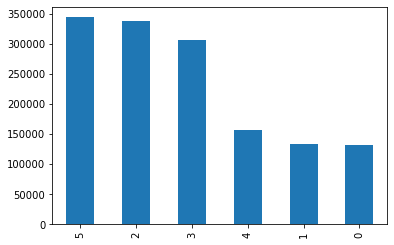

In [23]:
Labeled_data['Activity'].value_counts().plot.bar()

The dataset is not balanced for different classes. Activities like walk, stand and sit have more data than others.

<AxesSubplot:>

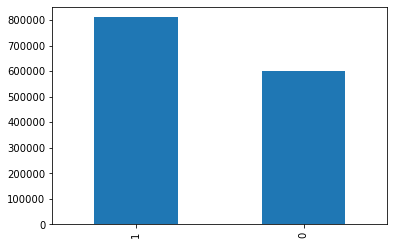

In [24]:
Labeled_data['gender'].value_counts().plot.bar()

Gender-wise its not too much imabalanced, there seems to be enough data for both genders.

<AxesSubplot:ylabel='Density'>

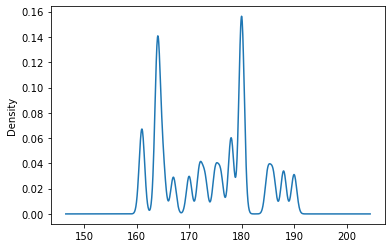

In [42]:
Labeled_data['height'].plot.density()

<AxesSubplot:ylabel='Density'>

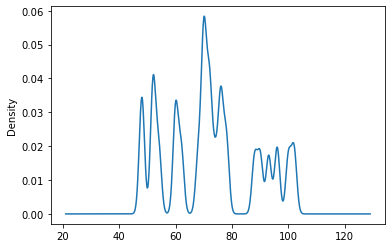

In [41]:
Labeled_data['weight'].plot.density()

<AxesSubplot:>

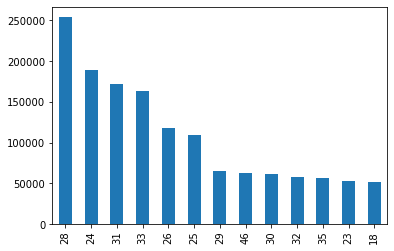

In [44]:
Labeled_data['age'].value_counts().plot.bar()

In [45]:
Labeled_data[['age', 'height', 'weight']].describe()

,age,height,weight
count,1.412865e+06,1.412865e+06,1.412865e+06
mean,2.883202e+01,1.739890e+02,7.212055e+01
std,5.303463e+00,8.798617e+00,1.598129e+01
min,1.800000e+01,1.610000e+02,4.800000e+01
25%,2.500000e+01,1.640000e+02,6.000000e+01
50%,2.800000e+01,1.750000e+02,7.200000e+01
75%,3.100000e+01,1.800000e+02,7.800000e+01
max,4.600000e+01,1.900000e+02,1.020000e+02


Subjects have age ranging from 18 to 46 however most subjects are in the age range of 24-33.

Subjects have height ranging from 161cm - 190cm with median height 175cms. However, 2 seperate peaks are visible at 165 cm and at 180cm indicating bi-modality.

Weight range of subjects is 48-102kgs with mean and median value of 72kgs.

### Checking for missing values

In [46]:
Labeled_data.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
Subject               0
Activity              0
gender                0
weight                0
height                0
age                   0
dtype: int64

There are no missing values in the data.

## Train-Test Split

Data for all activities for 20 subjects are taken for training dataset and remaining 4 subjects are kept for the test dataset. Data is not split randomly to preserve the sequence of time-series of activities in the data.

In [15]:
Train_set= Labeled_data.loc[Labeled_data['Subject'] <= 20]
Train_set.shape

(1182344, 18)

In [12]:
Test_set= Labeled_data.loc[Labeled_data['Subject'] > 20]
Test_set.shape

(230521, 18)

## Creating Sliding Window

Sliding window with overlap approach has been used for modelling this time-series activity data. Fixed window length of 100 (meaning subset of 100 rows for each window) with 50% overlap has been selected to construct the window frames. According to available literature this is the most commonly used approach for such data.

Sampling rate of the data is not known (it maybe 100Hz or 50Hz). With sampling rate of 100Hz it'll amount to window length of 1 sec and with 50Hz to 2 secs, but in any case window length of such time-frames is considered suitable for such analysis work in the available academic literature. Overlap of 50% will help in reducing the information loss and is also well known industry practice for such time-series analysis.

In [13]:
# Creating Sliding Window with 50% overlap
def sliding_window(Dataset, win_len):
  
    offset = int(np.round(win_len * 0.5))
    window_num = int((len(Dataset) / offset)-1)
    print(window_num)
    
    New_data = []
    for k in range(window_num):
        current_set = Dataset[(k*offset): (k*offset + win_len), :]
        New_data.append(current_set)
    return np.concatenate(New_data)

## Classification of Activity from the Data

### Data Pre-processing for models using all variables

In [14]:
# Dropping the Subject column as it does not add any useful information
Train_set_full= Train_set.drop(['Subject'], axis=1)
Test_set_full= Test_set.drop(['Subject'], axis=1)

In [15]:
# Data Normalisation

Train_set_full= Train_set_full.to_numpy()  # converting pandas dataframe to numpy array
Test_set_full= Test_set_full.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(Train_set_full[:,:-5], axis=0)
std = np.std(Train_set_full[:,:-5], axis=0)
Train_set_full[:,:-5] = (Train_set_full[:,:-5]-mean) / std
Test_set_full[:,:-5] = (Test_set_full[:,:-5]-mean) / std

In [16]:
win_len = 100
features = Train_set_full.shape[1]-5 #minus the label col
print(features)

12


In [17]:
# Applying to both Train and Test set
Train_set_full = sliding_window(Train_set_full, 100)
Train_set_full.shape

23645


(2364500, 17)

In [18]:
Test_set_full = sliding_window(Test_set_full, 100)
Test_set_full.shape

4609


(460900, 17)

In [19]:
# Splitting independent variables and Target Variable
X_train= Train_set_full[:, :-5]
y_train= Train_set_full[:, -5]
X_test= Test_set_full[:, :-5]
y_test= Test_set_full[:,-5]

In [20]:
# Reshaping Data to convert into window frames
X_train = np.reshape(X_train, (-1, win_len, features)) # 3-D array
X_test = np.reshape(X_test, (-1, win_len, features))
y_train = np.reshape(y_train,(-1, win_len)).astype(int) # 2-D array
y_test = np.reshape(y_test,(-1, win_len)).astype(int)

In [16]:
# Getting class with maximum counts for each window
def max_count(Dataset):
    y = np.zeros(len(Dataset))
    for i in range(len(Dataset)):
        counts = np.bincount(np.reshape(Dataset[i, :], (-1)))
        y[i] = np.argmax(counts)
    return y

In [22]:
y_train= max_count(y_train)
y_test= max_count(y_test)

### Balancing dataset for each activity class

Since the data was imbabalanced for each activity type, undersampling of majority class technique is applied to balance the different classes of activities before building models.

In [23]:
def Balanced(X, y, classes, sample_number):
    print('each class will have the same sample number')
    X_new = np.empty([0, win_len, features])
    y_new = np.empty([0])
    for i in range(classes):
        if len(X[y==i])<sample_number:
            print('Error: not enough samples for class '+str(i) +'please choose a smaller number')
            break
        else:
            X_new = np.concatenate((X_new, X[y==i][:sample_number]), axis=0)
            print(X_new.shape)
        
        y_new = np.concatenate((y_new, y[y==i][:sample_number]), axis=0)
        print(y_new)
    return X_new, y_new

In [24]:
classes= 6
size_per_class_train = 400
size_per_class_test = 200
X_train, y_train = Balanced(X_train, y_train, classes, size_per_class_train)
X_test, y_test = Balanced(X_test, y_test, classes, size_per_class_test)

each class will have the same sample number
(400, 100, 12)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [25]:
# Converting data back into vectors for classification
X_train_copy = np.reshape(X_train, (-1, features*win_len))
X_test_copy = np.reshape(X_test, (-1, features*win_len))
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [26]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy)

# Apply transform to both the training set and the test set.
X_train_copy = scaler.transform(X_train_copy)
X_test_copy = scaler.transform(X_test_copy)

### Building models using all variables

Initially various algorithms will be tried with no hyper-parameter tuning to create a baseline and to find out suitable models for further use. Evaluation metrics used throughout is the accuracy score.

#### Logistic Regression

In [27]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy, y_train_copy)

y_pred_full = clf.predict(X_test_copy)
acc_LR_full = accuracy_score(y_test_copy, y_pred_full)
print(acc_LR_full)

0.5191666666666667


Solver lbfgs was not converging hence tried liblinear and it is converging much faster. However accuracy score is not great! Possibly data is not linearly separable.

#### Non-linear SVM

In [28]:
clf = SVC(kernel="rbf")
clf.fit(X_train_copy, y_train_copy)

y_pred_full = clf.predict(X_test_copy)
acc_SVM_full = accuracy_score(y_test_copy, y_pred_full)
print(acc_SVM_full)

0.6783333333333333


Better, but still accuracy is low.

#### Random Forest Classifier

In [29]:
clf = RandomForestClassifier()
clf.fit(X_train_copy, y_train_copy)

y_pred_full = clf.predict(X_test_copy)
acc_RF_full = accuracy_score(y_test_copy, y_pred_full)
print(acc_RF_full)

0.5591666666666667


Tried Bootstrapping algorithm but still very low accuracy score.

#### XGBoost

In [30]:
clf = XGBClassifier(use_label_encoder=False)
clf.fit(X_train_copy, y_train_copy)

y_pred_full = clf.predict(X_test_copy)
acc_XGB_full = accuracy_score(y_test_copy, y_pred_full)
print(acc_XGB_full)

[14:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.78


Tried Boosting algorithm and the accuracy improved quite a bit!

#### K-Nearest Neighbours

In [31]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy, y_train_copy)

y_pred_full = clf.predict(X_test_copy)
acc_KNN_full = accuracy_score(y_test_copy, y_pred_full)
print(acc_KNN_full)

0.4141666666666667


Accuracy score is very low.

In [32]:
# Collating output from all the models
Accuracy_full_ML= pd.DataFrame({"Base Model": ["LR", "Non-linear SVM", "RF Classifier", "XGB Classifier", "KNN"],
                               "Accuracy Score": [acc_LR_full, acc_SVM_full, acc_RF_full, acc_XGB_full, acc_KNN_full]})
print(Accuracy_full_ML)

       Base Model  Accuracy Score
0              LR        0.519167
1  Non-linear SVM        0.678333
2   RF Classifier        0.559167
3  XGB Classifier        0.780000
4             KNN        0.414167


For base model with all variables and no hyper-parameter tuning the accuracy score has been low but XGBoost and non-linear SVM have been the best amongst all the models.

### Reducing No. of Features

From the background knowledge, we can maybe remove gravity data from the input as it may be providing redundant information and adding dimensionality with no gain. Accelerometer data provides information on user imparted acceleration and hence keeping gravity readings as well may not be very useful.

### Building model with reduced variables

New sets are created using train and test sets from previous section but prior to normalisation as removing more columns will change the mean and standard deviation accordingly. All other data pre-processing steps are repeated on the new reduced sets.

In [17]:
# Dropping the Subject and gravity columns as it does not add any useful information
Train_set_red= Train_set.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)
Test_set_red= Test_set.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)

In [18]:
# Data Normalisation
Train_set_red= Train_set_red.to_numpy()  # converting pandas dataframe to numpy array
Test_set_red= Test_set_red.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(Train_set_red[:,:-5], axis=0)
std = np.std(Train_set_red[:,:-5], axis=0)
Train_set_red[:,:-5] = (Train_set_red[:,:-5]-mean) / std
Test_set_red[:,:-5] = (Test_set_red[:,:-5]-mean) / std

In [19]:
win_len = 100
features = Train_set_red.shape[1]-5 #minus the label col
print(features)

9


Now number of features have reduced to 9.

In [20]:
# Creating Sliding Window with 50% overlap for both Train and Test sets
Train_set_red = sliding_window(Train_set_red, 100)
Train_set_red.shape

23645


(2364500, 14)

In [21]:
Test_set_red = sliding_window(Test_set_red, 100)
Test_set_red.shape

4609


(460900, 14)

In [39]:
# Splitting independent variables and Target Variable
X_train_red= Train_set_red[:, :-5]
y_train_red= Train_set_red[:, -5]
X_test_red= Test_set_red[:, :-5]
y_test_red= Test_set_red[:,-5]

In [40]:
# Reshaping Data to convert into window frames
X_train_red = np.reshape(X_train_red, (-1, win_len, features)) # 3-D array
X_test_red = np.reshape(X_test_red, (-1, win_len, features))
y_train_red = np.reshape(y_train_red,(-1, win_len)).astype(int) # 2-D array
y_test_red = np.reshape(y_test_red,(-1, win_len)).astype(int)

In [41]:
# Getting activity class with maximum counts for each window
y_train_red= max_count(y_train_red)
y_test_red= max_count(y_test_red)

In [42]:
# Balancing dataset for each activity class
classes= 6
size_per_class_train = 400
size_per_class_test = 200
X_train_red, y_train_red = Balanced(X_train_red, y_train_red, classes, size_per_class_train)
X_test_red, y_test_red = Balanced(X_test_red, y_test_red, classes, size_per_class_test)

each class will have the same sample number
(400, 100, 9)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [43]:
# Converting data back into vectors for classification
X_train_copy_red = np.reshape(X_train_red, (-1, features*win_len))
X_test_copy_red = np.reshape(X_test_red, (-1, features*win_len))
y_train_copy_red = y_train_red.copy()
y_test_copy_red = y_test_red.copy()

In [44]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_red)

# Apply transform to both the training set and the test set.
X_train_copy_red = scaler.transform(X_train_copy_red)
X_test_copy_red = scaler.transform(X_test_copy_red)

Trying all the models again on the reduced dataset.

#### Logistic Regression

In [45]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_red, y_train_copy_red)

y_pred_red = clf.predict(X_test_copy_red)
acc_LR_red = accuracy_score(y_test_copy_red, y_pred_red)
print(acc_LR_red)

0.5116666666666667


#### Non-linear SVM

In [46]:
clf = SVC(kernel="rbf")
clf.fit(X_train_copy_red, y_train_copy_red)

y_pred_red = clf.predict(X_test_copy_red)
acc_SVM_red = accuracy_score(y_test_copy_red, y_pred_red)
print(acc_SVM_red)

0.7866666666666666


#### Random Forest Classifier

In [47]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_red, y_train_copy_red)

y_pred_red = clf.predict(X_test_copy_red)
acc_RF_red = accuracy_score(y_test_copy_red, y_pred_red)
print(acc_RF_red)

0.5991666666666666


#### XGBoost

In [48]:
clf = XGBClassifier(use_label_encoder=False)
clf.fit(X_train_copy_red, y_train_copy_red)

y_pred_red = clf.predict(X_test_copy_red)
acc_XGB_red = accuracy_score(y_test_copy_red, y_pred_red)
print(acc_XGB_red)

[14:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7616666666666667


#### K-Nearest Neighbours

In [49]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_red, y_train_copy_red)

y_pred_red = clf.predict(X_test_copy_red)
acc_KNN_red = accuracy_score(y_test_copy_red, y_pred_red)
print(acc_KNN_red)

0.37666666666666665


In [50]:
# Collating output from all the models
Accuracy_red_ML= pd.DataFrame({"Reduced Model": ["LR", "Non-linear SVM", "RF Classifier", "XGB Classifier", "KNN"],
                               "Accuracy Score": [acc_LR_red, acc_SVM_red, acc_RF_red, acc_XGB_red, acc_KNN_red]})
print(Accuracy_red_ML)

    Reduced Model  Accuracy Score
0              LR        0.511667
1  Non-linear SVM        0.786667
2   RF Classifier        0.599167
3  XGB Classifier        0.761667
4             KNN        0.376667


Accuracy scores improved a little bit from the base models but still are not very high. Non-linear SVM and XGBoost have been performing better in both cases.

### Hyper-parameter tuning

Can try hyperparameter tuning for non-linear SVM using GridSearchCV if that helps in improving the accuracy score.

#### SVM

In [53]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']} # creating parameters dictionary
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_copy_red, y_train_copy_red)
print(grid.best_estimator_) # getting optimal parameters

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.2s
[CV] END .....................C=0.1, gamma=1, k

In [54]:
# Refitting onto train set
grid.best_estimator_.fit(X_train_copy_red, y_train_copy_red)

SVC(C=10, gamma=0.001)

In [55]:
# Predicting on test set
y_pred_red_tuned = grid.best_estimator_.predict(X_test_copy_red)
acc_SVM_red_tuned = accuracy_score(y_test_copy_red, y_pred_red_tuned)
print(acc_SVM_red_tuned)

0.7833333333333333


Hyper-parameter tuning didn't seemed to improve the accuracy score any further!

## Deep Learning Models for classification of Activity

Since traditional ML algorithms were giving the accuracy score around 80% and even hyper-parameter tuning does not seem to improve the score further, trying some Deep Learning algorithms- CNN and LSTM both of which are well known for working well on sequential/spatial data. Also they do not need any feature engineering.

### Convolutional Neural Network

#### Data Pre-processing

In [51]:
# Splitting independent variables and Target Variable
X_train_CNN= Train_set_red[:, :-5]
y_train_CNN= Train_set_red[:, -5]
X_test_CNN= Test_set_red[:, :-5]
y_test_CNN= Test_set_red[:,-5]

In [52]:
# Reshaping Data
X_train = np.reshape(X_train_CNN, (-1, win_len, features, 1))
X_test = np.reshape(X_test_CNN, (-1, win_len, features, 1))
y_train = np.reshape(y_train_CNN,(-1, win_len)).astype(int)
y_test = np.reshape(y_test_CNN,(-1, win_len)).astype(int)

In [53]:
y_train= max_count(y_train)
y_test= max_count(y_test)

In [54]:
# One hot encoding for labels
classes= 6
y_train_copy = keras.utils.np_utils.to_categorical(y_train, classes)

#### Building Base model

First I have started with an input layer, pooling layer and a dropout layer followed by flattening and a dense layer. And added another drop out layer before the final output layer.

In [55]:
model= Sequential() # initialising
model.add(Conv2D(16, kernel_size=(1, 3), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 9, 16)        64        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 4, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 4, 16)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 16)                102416    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

In [56]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [57]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=64,
            epochs=3,
            verbose=1,
            shuffle=True)

Epoch 1/3
370/370 [==============================] - 49s 98ms/step - loss: 1.0751 - accuracy: 0.6095
Epoch 2/3
370/370 [==============================] - 39s 105ms/step - loss: 0.8694 - accuracy: 0.6973
Epoch 3/3
370/370 [==============================] - 39s 106ms/step - loss: 0.7802 - accuracy: 0.7083


Accuracy score doesn't look very great!

#### Adding another set of convolution, pooling and dropout layer

In [62]:
model= Sequential() # initialising
model.add(Conv2D(16, kernel_size=(1, 3), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=(1, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 9, 16)        64        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 4, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 100, 4, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 4, 16)        784       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 2, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 100, 2, 16)       

In [63]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [64]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=64,
            epochs=3,
            verbose=1,
            shuffle=True)

Epoch 1/3
370/370 [==============================] - 58s 149ms/step - loss: 1.1919 - accuracy: 0.5291
Epoch 2/3
370/370 [==============================] - 57s 155ms/step - loss: 0.9629 - accuracy: 0.6015
Epoch 3/3
370/370 [==============================] - 58s 156ms/step - loss: 0.9127 - accuracy: 0.6235


Accuracy score got even lower!

#### Adding number of nodes into layers

In [65]:
model= Sequential() # initialising
model.add(Conv2D(32, kernel_size=(1, 3), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(1, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 9, 32)        128       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 4, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 100, 4, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 4, 32)        3104      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 2, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 100, 2, 32)       

In [66]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [67]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=64,
            epochs=3,
            verbose=1,
            shuffle=True)

Epoch 1/3
370/370 [==============================] - 122s 324ms/step - loss: 0.7575 - accuracy: 0.6981
Epoch 2/3
370/370 [==============================] - 141s 381ms/step - loss: 0.4983 - accuracy: 0.8031
Epoch 3/3
370/370 [==============================] - 128s 345ms/step - loss: 0.4062 - accuracy: 0.8465


accuracy score improved quite a bit by increasing the number of nodes in the layers!

#### Increasing batch size and number of Epochs

In [68]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 116s 622ms/step - loss: 0.3609 - accuracy: 0.8690
Epoch 2/5
185/185 [==============================] - 115s 619ms/step - loss: 0.3285 - accuracy: 0.8851
Epoch 3/5
185/185 [==============================] - 115s 623ms/step - loss: 0.3057 - accuracy: 0.8917
Epoch 4/5
185/185 [==============================] - 114s 619ms/step - loss: 0.2918 - accuracy: 0.8988
Epoch 5/5
185/185 [==============================] - 115s 623ms/step - loss: 0.2757 - accuracy: 0.9058


accuracy score further improved by increasing the batch size and number of epochs.

#### Increasing kernel size

In [69]:
model= Sequential() # initialising
model.add(Conv2D(32, kernel_size=(1, 5), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(1, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 100, 9, 32)        192       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 100, 4, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 100, 4, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 4, 32)        5152      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 2, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 100, 2, 32)       

In [70]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [71]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 140s 743ms/step - loss: 0.7938 - accuracy: 0.6965
Epoch 2/5
185/185 [==============================] - 135s 731ms/step - loss: 0.4692 - accuracy: 0.8263
Epoch 3/5
185/185 [==============================] - 135s 730ms/step - loss: 0.3709 - accuracy: 0.8675
Epoch 4/5
185/185 [==============================] - 134s 723ms/step - loss: 0.3191 - accuracy: 0.8892
Epoch 5/5
185/185 [==============================] - 135s 728ms/step - loss: 0.2900 - accuracy: 0.9015


accuracy score increased by increasing the kernel size.

In [72]:
model= Sequential() # initialising
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 9, 32)        256       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 4, 32)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 100, 4, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 4, 32)        7200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 2, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 100, 2, 32)       

In [73]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [74]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 157s 831ms/step - loss: 0.9433 - accuracy: 0.6233
Epoch 2/5
185/185 [==============================] - 155s 840ms/step - loss: 0.6140 - accuracy: 0.7468
Epoch 3/5
185/185 [==============================] - 155s 838ms/step - loss: 0.5263 - accuracy: 0.7920
Epoch 4/5
185/185 [==============================] - 156s 844ms/step - loss: 0.4772 - accuracy: 0.8068
Epoch 5/5
185/185 [==============================] - 162s 877ms/step - loss: 0.4477 - accuracy: 0.8182


accuracy score increased by increasing the kernel_size.

#### Adding another convolution layer after input layer to give it better chance to learn the patterns before pooling and dropout

In [75]:
model= Sequential() # initialising
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 100, 9, 32)        256       
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 9, 32)        7200      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 100, 4, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 100, 4, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 4, 32)        7200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 2, 32)       0         
 g2D)                                                 

In [76]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [77]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 323s 2s/step - loss: 0.8225 - accuracy: 0.6628
Epoch 2/5
185/185 [==============================] - 328s 2s/step - loss: 0.4494 - accuracy: 0.8264
Epoch 3/5
185/185 [==============================] - 309s 2s/step - loss: 0.3722 - accuracy: 0.8659
Epoch 4/5
185/185 [==============================] - 310s 2s/step - loss: 0.3217 - accuracy: 0.8860
Epoch 5/5
185/185 [==============================] - 314s 2s/step - loss: 0.2856 - accuracy: 0.8994


Its observed that adding more layers does not improve accuracy score but adding number of nodes in each layer significantly improves the accuracy.

#### Final CNN Model

Final model has an input layer, then pooling layer followed by a dopout layer. Then another set of convolution, pooling and dropout layer before flattening and then a dense and dropout layer before final output layer. Activation function is relu for all the layers except output layer where it is softmax function. Kernel size selected is 1x7 and padding is kept to be same. 50% dropout is selected and number of filters in each layer is kept as 64. Batch size is kept as 128 and number of Epochs to be 5.

In [78]:
model= Sequential() # initialising
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 9, 64)        512       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 100, 4, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 100, 4, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 4, 64)        28736     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 100, 2, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 100, 2, 64)       

In [79]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [80]:
# Fitting CNN model
CNN = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 379s 2s/step - loss: 0.7604 - accuracy: 0.7086
Epoch 2/5
185/185 [==============================] - 380s 2s/step - loss: 0.4117 - accuracy: 0.8494
Epoch 3/5
185/185 [==============================] - 374s 2s/step - loss: 0.3581 - accuracy: 0.8747
Epoch 4/5
185/185 [==============================] - 378s 2s/step - loss: 0.3139 - accuracy: 0.8937
Epoch 5/5
185/185 [==============================] - 378s 2s/step - loss: 0.2865 - accuracy: 0.9032


#### Predicting on Test Data

In [81]:
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8837057930136689


### Long-Short Term Memory

In [82]:
# Reshaping Data
X_train = np.reshape(X_train_CNN, (-1, win_len, features))
X_test = np.reshape(X_test_CNN, (-1, win_len, features))

In [83]:
model= Sequential()
model.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           5376      
                                                                 
 dropout_23 (Dropout)        (None, 100, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 6)                 390       
                                                                 
Total params: 30,598
Trainable params: 30,598
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [85]:
# Fitting LSTM model
LSTM = model.fit(X_train, y_train_copy,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 158s 755ms/step - loss: 0.7506 - accuracy: 0.7441
Epoch 2/5
185/185 [==============================] - 140s 757ms/step - loss: 0.2741 - accuracy: 0.9270
Epoch 3/5
185/185 [==============================] - 139s 749ms/step - loss: 0.2049 - accuracy: 0.9447
Epoch 4/5
185/185 [==============================] - 141s 760ms/step - loss: 0.1990 - accuracy: 0.9515
Epoch 5/5
185/185 [==============================] - 142s 768ms/step - loss: 0.1472 - accuracy: 0.9645


In [86]:
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9318724235192015


The base model gives decent accuracy score and no further hyper-parameter tuning is being considered.

### Overall Summary for prediction of activity from available data

Support Vector Classifier, XGBoost Classifier have been found the best amongst the traditional ML algorithms giving an accuracy score around 80%. However DL models have been found to be better performing with CNN giving an accuracy score around 88% and LSTM giving around 93%.

## Classification of Gender from the data

Only reduced dataset with Attitude, Useracceleration and Rotation Rate as input variables will be used and will try all the different models as were used on classification of activity.

### Data Pre-processing

In [22]:
# Splitting independent variables and Target Variable
X_train_gender= Train_set_red[:, :-5]
y_train_gender= Train_set_red[:, -4]
X_test_gender= Test_set_red[:, :-5]
y_test_gender= Test_set_red[:,-4]

In [23]:
# Reshaping Data to convert into window frames
X_train_gender = np.reshape(X_train_gender, (-1, win_len, features)) # 3-D array
X_test_gender = np.reshape(X_test_gender, (-1, win_len, features))
y_train_gender = np.reshape(y_train_gender,(-1, win_len)).astype(int) # 2-D array
y_test_gender = np.reshape(y_test_gender,(-1, win_len)).astype(int)

In [24]:
# Getting activity class with maximum counts for each window
y_train_gender= max_count(y_train_gender)
y_test_gender= max_count(y_test_gender)

In [90]:
# Converting data back into vectors for classification
X_train_copy_gender = np.reshape(X_train_gender, (-1, features*win_len))
X_test_copy_gender = np.reshape(X_test_gender, (-1, features*win_len))
y_train_copy_gender = y_train_gender.copy()
y_test_copy_gender = y_test_gender.copy()

In [91]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_gender)

# Apply transform to both the training set and the test set.
X_train_copy_gender = scaler.transform(X_train_copy_gender)
X_test_copy_gender = scaler.transform(X_test_copy_gender)

### Building model

#### Logistic Regression

In [92]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_LR_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_LR_gender)

0.6174875244087654


Used Liblinear solver here as default lbfgs was failing to converge even with max_iter= 1000. Changing the solver did not changed the accuracy score but only helped in convergence faster.

#### Non-linear SVM

In [93]:
clf = SVC(kernel="rbf")
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_SVM_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_SVM_gender)

0.5458884790627034


accuracy score is only around 55%, which is not great!

#### XGBoost

In [94]:
clf = XGBClassifier(use_label_encoder=False)
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_XGB_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_XGB_gender)

[18:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5378607073117813


#### Random Forest

In [95]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_RF_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_RF_gender)

0.5382946409199393


#### KNN

In [96]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_KNN_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_KNN_gender)

0.49598611412453897


In [97]:
# Collating output from all the models
Accuracy_gender_ML= pd.DataFrame({"Model": ["LR", "Non-linear SVM", "RF Classifier", "XGB Classifier", "KNN"],
                               "Accuracy Score": [acc_LR_gender, acc_SVM_gender, acc_RF_gender, acc_XGB_gender, acc_KNN_gender]})
print(Accuracy_gender_ML)

            Model  Accuracy Score
0              LR        0.617488
1  Non-linear SVM        0.545888
2   RF Classifier        0.538295
3  XGB Classifier        0.537861
4             KNN        0.495986


Amongst the traditional ML models without any hyper-parameter tuning, best accuracy score obtained is 62% using Logistic Regression. However, accuracy score is very low, can try tuning it's hyperparameters.

#### Hyper-parameter tuning for Logistic Regression

Since it was already observed that solver was not helping with improving the accuracy score but only in speed of convergence and lbfgs was taking very long whilst liblinear worked fine, it will be kept constant and different penalty and C values will be tried using GridSearchCV. C values control the penalty strength. 

In [78]:
param_grid = {'C': [0.1,1, 10, 100], 'penalty': ['l1', 'l2']} # creating parameters dictionary
grid = GridSearchCV(LogisticRegression(solver= 'liblinear'),param_grid,refit=True,verbose=2)
grid.fit(X_train_copy_gender, y_train_copy_gender)
print(grid.best_estimator_) # getting optimal parameters

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time= 1.3min
[CV] END ..................................C=0.1, penalty=l1; total time=  33.1s
[CV] END ..................................C=0.1, penalty=l1; total time=  38.7s
[CV] END ..................................C=0.1, penalty=l1; total time=  45.9s
[CV] END ..................................C=0.1, penalty=l1; total time=  48.2s
[CV] END ..................................C=0.1, penalty=l2; total time=  50.2s
[CV] END ..................................C=0.1, penalty=l2; total time=  51.2s
[CV] END ..................................C=0.1, penalty=l2; total time= 1.0min
[CV] END ..................................C=0.1, penalty=l2; total time=  49.9s
[CV] END ..................................C=0.1, penalty=l2; total time=  56.1s
[CV] END ....................................C=1, penalty=l1; total time= 5.4min
[CV] END ....................................C=1,

C:\Users\kapil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] END ..................................C=100, penalty=l1; total time=90.9min
[CV] END ..................................C=100, penalty=l2; total time= 6.2min
[CV] END ..................................C=100, penalty=l2; total time= 8.5min
[CV] END ..................................C=100, penalty=l2; total time= 5.7min
[CV] END ..................................C=100, penalty=l2; total time= 6.9min
[CV] END ..................................C=100, penalty=l2; total time= 8.5min
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [79]:
# Refitting onto train set
grid.best_estimator_.fit(X_train_copy_gender, y_train_copy_gender)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [80]:
# Predicting on test set
y_pred_gender_tuned = grid.best_estimator_.predict(X_test_copy_gender)
acc_LR_gender_tuned = accuracy_score(y_test_copy_gender, y_pred_gender_tuned)
print(acc_LR_gender_tuned)

0.6229116945107399


Optimal parameters identified are C=0.1, penalty= l1 and solver= liblinear however there is no improvement any further in accuracy score by hyper-parameter tuning.

#### LSTM

In [25]:
# One hot encoding for labels
classes= 2
y_train_LSTM = keras.utils.np_utils.to_categorical(y_train_gender, classes)

In [26]:
model_gender= Sequential()
model_gender.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_gender.add(Dropout(0.5))
model_gender.add(LSTM(64))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(2, activation='sigmoid'))
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           5376      
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 30,338
Trainable params: 30,338
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_gender.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [28]:
# Fitting LSTM model
LSTM = model_gender.fit(X_train_gender, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 165s 752ms/step - loss: 0.5147 - accuracy: 0.7302
Epoch 2/5
185/185 [==============================] - 138s 743ms/step - loss: 0.3274 - accuracy: 0.8468
Epoch 3/5
185/185 [==============================] - 135s 728ms/step - loss: 0.2691 - accuracy: 0.8756
Epoch 4/5
185/185 [==============================] - 134s 727ms/step - loss: 0.2736 - accuracy: 0.8741
Epoch 5/5
185/185 [==============================] - 135s 733ms/step - loss: 0.1851 - accuracy: 0.9228


In [29]:
y_pred = np.argmax(model_gender.predict(X_test_gender), axis=1)
acc = accuracy_score(y_test_gender, y_pred)
print(acc)

0.5111737904100673


Test accuracy is very low than the training accuracy meaning the model is overfitted.

#### Reducing the complexity (hidden layers) to try to reduce overfitting

In [37]:
model_gender= Sequential()
model_gender.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_gender.add(Dropout(0.5))
model_gender.add(Flatten())
model_gender.add(Dense(2, activation='sigmoid'))
model_gender.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 32)           5376      
                                                                 
 dropout_3 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6402      
                                                                 
Total params: 11,778
Trainable params: 11,778
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_gender.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [39]:
# Fitting LSTM model
LSTM = model_gender.fit(X_train_gender, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 60s 249ms/step - loss: 0.4283 - accuracy: 0.7904
Epoch 2/5
185/185 [==============================] - 47s 256ms/step - loss: 0.2113 - accuracy: 0.9078
Epoch 3/5
185/185 [==============================] - 50s 271ms/step - loss: 0.1488 - accuracy: 0.9371
Epoch 4/5
185/185 [==============================] - 50s 268ms/step - loss: 0.1170 - accuracy: 0.9517
Epoch 5/5
185/185 [==============================] - 48s 261ms/step - loss: 0.0955 - accuracy: 0.9602


In [40]:
y_pred = np.argmax(model_gender.predict(X_test_gender), axis=1)
acc = accuracy_score(y_test_gender, y_pred)
print(acc)

0.5927533087437622


Test accuracy improved a bit but still model is overfitting. Can try to reduce number of nodes as well as number of epochs.

In [28]:
model_gender= Sequential()
model_gender.add(LSTM(16, input_shape= (win_len, features), return_sequences=True))
model_gender.add(Dropout(0.5))
model_gender.add(Flatten())
model_gender.add(Dense(2, activation='sigmoid'))
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 16)           1664      
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 2)                 3202      
                                                                 
Total params: 4,866
Trainable params: 4,866
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_gender.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting LSTM model
LSTM = model_gender.fit(X_train_gender, y_train_LSTM,
            batch_size=128,
            epochs=3,
            verbose=1,
            shuffle=True)

Epoch 1/3
 52/185 [=======>......................] - ETA: 16s - loss: 0.0803 - accuracy: 0.9648

In [35]:
y_pred = np.argmax(model_gender.predict(X_test_gender), axis=1)
acc_LSTM = accuracy_score(y_test_gender, y_pred)
print(acc)

0.5623779561727056


That didn't helped either, still overfitting and not generalising well. Can try CNN.

#### CNN

First will try the same architecture as final model from classification of activity but changing activation function for output to sigmoid, number of nodes in output layer to 2 and loss function as binary_cross entropy.

In [100]:
# Reshaping Data
X_train_CNN = np.reshape(X_train_gender, (-1, win_len, features, 1))
X_test_CNN = np.reshape(X_test_gender, (-1, win_len, features, 1))

In [101]:
model= Sequential() # initialising
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 9, 64)        512       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 4, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 100, 4, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 4, 64)        28736     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 100, 2, 64)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 100, 2, 64)      

In [102]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [103]:
CNN = model.fit(X_train_CNN, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 381s 2s/step - loss: 0.5772 - accuracy: 0.6812
Epoch 2/5
185/185 [==============================] - 374s 2s/step - loss: 0.3724 - accuracy: 0.8561
Epoch 3/5
185/185 [==============================] - 410s 2s/step - loss: 0.2932 - accuracy: 0.9037
Epoch 4/5
185/185 [==============================] - 374s 2s/step - loss: 0.2321 - accuracy: 0.9162
Epoch 5/5
185/185 [==============================] - 375s 2s/step - loss: 0.1947 - accuracy: 0.9326


In [104]:
y_pred = np.argmax(model.predict(X_test_CNN), axis=1)
acc = accuracy_score(y_test_gender, y_pred)
print(acc)

0.5265784334996746


Getting the same problem of overfitting. Can try to reduce the complexity of the model by reducing number of epochs, batch size, number of layers and nodes.

In [105]:
model= Sequential() # initialising
model.add(Conv2D(16, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 9, 16)        128       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 100, 4, 16)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 100, 4, 16)        0         
                                                                 
 flatten_9 (Flatten)         (None, 6400)              0         
                                                                 
 dense_19 (Dense)            (None, 2)                 12802     
                                                                 
Total params: 12,930
Trainable params: 12,930
Non-trainable params: 0
_________________________________________________

In [106]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [107]:
CNN = model.fit(X_train_CNN, y_train_LSTM,
            batch_size=64,
            epochs=2,
            verbose=1,
            shuffle=True)

Epoch 1/2
370/370 [==============================] - 38s 98ms/step - loss: 0.5180 - accuracy: 0.7474
Epoch 2/2
370/370 [==============================] - 33s 88ms/step - loss: 0.3885 - accuracy: 0.8322


In [108]:
y_pred = np.argmax(model.predict(X_test_CNN), axis=1)
acc_CNN = accuracy_score(y_test_gender, y_pred)
print(acc)

0.5265784334996746


That didn't helped much either.

Maybe data for activities like sitting, standing (latent activities) do not add much useful information for gender classification. Can try on subset of data without those activities.

### Without Sitting and Standing Data

In [109]:
Train_set_gender= Labeled_data[(Labeled_data['Activity'] != 2) & (Labeled_data['Activity'] != 3) & (Labeled_data['Subject'] <= 20)]
Train_set_gender.shape

(638623, 18)

In [110]:
Test_set_gender= Labeled_data[(Labeled_data['Activity'] != 2) & (Labeled_data['Activity'] != 3) & (Labeled_data['Subject'] > 20)]
Test_set_gender.shape

(129037, 18)

In [111]:
# Dropping the Subject and gravity columns as it does not add any useful information
Train_set_gender= Train_set_gender.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)
Test_set_gender= Test_set_gender.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)

In [112]:
# Data Normalisation
Train_set_gender= Train_set_gender.to_numpy()  # converting pandas dataframe to numpy array
Test_set_gender= Test_set_gender.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(Train_set_gender[:,:-5], axis=0)
std = np.std(Train_set_gender[:,:-5], axis=0)
Train_set_gender[:,:-5] = (Train_set_gender[:,:-5]-mean) / std
Test_set_gender[:,:-5] = (Test_set_gender[:,:-5]-mean) / std

In [113]:
win_len = 100
features = Train_set_gender.shape[1]-5 #minus the label col
print(features)

9


In [114]:
# Creating Sliding Window with 50% overlap for both Train and Test sets
Train_set_gender = sliding_window(Train_set_gender, 100)
Train_set_gender.shape

12771


(1277100, 14)

In [115]:
Test_set_gender = sliding_window(Test_set_gender, 100)
Test_set_gender.shape

2579


(257900, 14)

In [116]:
# Splitting independent variables and Target Variable
X_train_gender= Train_set_gender[:, :-5]
y_train_gender= Train_set_gender[:, -4]
X_test_gender= Test_set_gender[:, :-5]
y_test_gender= Test_set_gender[:,-4]

In [117]:
# Reshaping Data to convert into window frames
X_train_gender = np.reshape(X_train_gender, (-1, win_len, features)) # 3-D array
X_test_gender = np.reshape(X_test_gender, (-1, win_len, features))
y_train_gender = np.reshape(y_train_gender,(-1, win_len)).astype(int) # 2-D array
y_test_gender = np.reshape(y_test_gender,(-1, win_len)).astype(int)

In [118]:
# Getting activity class with maximum counts for each window
y_train_gender= max_count(y_train_gender)
y_test_gender= max_count(y_test_gender)

In [119]:
# Converting data back into vectors for classification
X_train_copy_gender = np.reshape(X_train_gender, (-1, features*win_len))
X_test_copy_gender = np.reshape(X_test_gender, (-1, features*win_len))
y_train_copy_gender = y_train_gender.copy()
y_test_copy_gender = y_test_gender.copy()

In [120]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_gender)

# Apply transform to both the training set and the test set.
X_train_copy_gender = scaler.transform(X_train_copy_gender)
X_test_copy_gender = scaler.transform(X_test_copy_gender)

#### Logistic Regression

In [121]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_LR_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_LR_gender)

0.5250096936797208


#### Random Forest

In [122]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_gender, y_train_copy_gender)

y_pred_gender = clf.predict(X_test_copy_gender)
acc_RF_gender = accuracy_score(y_test_copy_gender, y_pred_gender)
print(acc_RF_gender)

0.5370298565335402


It didn't helped either in improving the test accuracy and hence will not be trying other models on this reduced data.

#### Overall Summary of Prediction of Gender from the data

Overall Logistic Regression has been found to be having the highest prediction accuracy score of around 62% amongst all the models tried. Reducing the data from certain activities like sitting and standing further reduces the performance and is not useful. Deep Learning models tried are observed to be having overfitting issues which is not improving even with reduction in complexity of models. Hyper-parameter tuning for Logistic regression didn't help either in increasing the test accuracy score any further.

## Classification of age from data

In [123]:
# Splitting independent variables and Target Variable
X_train_age= Train_set_red[:, :-5]
y_train_age= Train_set_red[:, -1]
X_test_age= Test_set_red[:, :-5]
y_test_age= Test_set_red[:,-1]

In [124]:
# Converting age to categorical
y_train_age_cat= np.digitize(y_train_age, bins=[20,30,40])
y_test_age_cat= np.digitize(y_test_age, bins=[20,30,40])

In [125]:
# Reshaping Data to convert into window frames
X_train_age = np.reshape(X_train_age, (-1, win_len, features)) # 3-D array
X_test_age = np.reshape(X_test_age, (-1, win_len, features))
y_train_age = np.reshape(y_train_age_cat,(-1, win_len)).astype(int) # 2-D array
y_test_age = np.reshape(y_test_age_cat,(-1, win_len)).astype(int)

In [126]:
# Getting target variable class with maximum counts for each window
y_train_age= max_count(y_train_age)
y_test_age= max_count(y_test_age)

In [127]:
# Converting data back into vectors for classification
X_train_copy_age = np.reshape(X_train_age, (-1, features*win_len))
X_test_copy_age = np.reshape(X_test_age, (-1, features*win_len))
y_train_copy_age = y_train_age.copy()
y_test_copy_age = y_test_age.copy()

In [128]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_age)

# Apply transform to both the training set and the test set.
X_train_copy_age = scaler.transform(X_train_copy_age)
X_test_copy_age = scaler.transform(X_test_copy_age)

#### Logitic Regression

In [129]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_LR_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_LR_age)

0.4623562594922977


#### Non-linear SVM

In [130]:
clf = SVC(kernel="rbf")
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_SVM_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_SVM_age)

0.47667606856151007


Prediction accuracy is not great.

#### Random Forest

In [131]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_RF_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_RF_age)

0.40919939249294857


#### KNN

In [132]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_KNN_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_KNN_age)

0.5074853547407246


#### XGBoost

In [136]:
clf = XGBClassifier()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_XGB_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_XGB_age)

C:\Users\kapil\anaconda3\envs\Tensor_keras\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4163592970275548


Even though bins for the label (age) is created as 0,1,2,3, there is no class 0 (age <20 years) present in the training data and hence XGB Classifier is giving error with use of label_encoder= False in the settings. The warning that use of label encoder in future will be deprecated and hence before running this code in future, solution to working without use of label encoder will needed to be considered for such a use case.

In [137]:
# Collating output from all models
Accuracy_age_ML= pd.DataFrame({"Model": ["LR", "Non-linear SVM", "RF Classifier", "KNN", "XGB Classifier"],
                               "Accuracy Score": [acc_LR_age, acc_SVM_age, acc_RF_age, acc_KNN_age, acc_XGB_age]})
print(Accuracy_age_ML)

            Model  Accuracy Score
0              LR        0.462356
1  Non-linear SVM        0.476676
2   RF Classifier        0.409199
3             KNN        0.376667
4  XGB Classifier        0.416359


#### LSTM

In [142]:
# One hot encoding for labels
classes= 4
y_train_LSTM = keras.utils.np_utils.to_categorical(y_train_age, classes)

In [151]:
model_age= Sequential()
model_age.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_age.add(Dropout(0.5))
model_age.add(Flatten())
model_age.add(Dense(4, activation='softmax'))
model_age.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 dropout_8 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 4)                 12804     
                                                                 
Total params: 18,180
Trainable params: 18,180
Non-trainable params: 0
_________________________________________________________________


In [152]:
model_age.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [153]:
# Fitting LSTM model
LSTM = model_age.fit(X_train_age, y_train_LSTM,
            batch_size=128,
            epochs=2,
            verbose=1,
            shuffle=True)

Epoch 1/2
185/185 [==============================] - 56s 251ms/step - loss: 0.7357 - accuracy: 0.6548
Epoch 2/2
185/185 [==============================] - 49s 268ms/step - loss: 0.4616 - accuracy: 0.7962


In [155]:
y_pred = np.argmax(model_age.predict(X_test_age), axis=1)
acc = accuracy_score(y_test_age, y_pred)
print(acc)

0.41917986548058145


Model is overfitting and is not generalising well. Can try CNN.

#### CNN

In [138]:
# Reshaping Data
X_train = np.reshape(X_train_age, (-1, win_len, features, 1))
X_test = np.reshape(X_test_age, (-1, win_len, features, 1))

In [144]:
model= Sequential() # initialising
model.add(Conv2D(16, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 100, 9, 16)        128       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 100, 4, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 100, 4, 16)        0         
                                                                 
 flatten_11 (Flatten)        (None, 6400)              0         
                                                                 
 dense_21 (Dense)            (None, 4)                 25604     
                                                                 
Total params: 25,732
Trainable params: 25,732
Non-trainable params: 0
_________________________________________________

In [145]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [146]:
# Fitting model
CNN = model.fit(X_train, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 37s 187ms/step - loss: 0.7968 - accuracy: 0.6234s
Epoch 2/5
185/185 [==============================] - 34s 185ms/step - loss: 0.6778 - accuracy: 0.6946
Epoch 3/5
185/185 [==============================] - 34s 184ms/step - loss: 0.6257 - accuracy: 0.7232
Epoch 4/5
185/185 [==============================] - 34s 182ms/step - loss: 0.5981 - accuracy: 0.7331
Epoch 5/5
185/185 [==============================] - 34s 186ms/step - loss: 0.5796 - accuracy: 0.7432


In [147]:
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test_age, y_pred)
print(acc)

0.49403341288782815


Having similar issues of overfitting with low prediction accuracy score. Can try with balancing the classes.

#### Balancing each class using SMOTE technique

There is high imbalance in the data as most of the subjects are in the age range 24-33 and only few are below 20 or above 40.

In [148]:
np.unique(y_train_age_cat, return_counts= True)

(array([1, 2, 3], dtype=int64),
 array([1330776,  909150,  124574], dtype=int64))

In [149]:
np.unique(y_test_age_cat, return_counts= True)

(array([0, 1, 2], dtype=int64), array([101918, 246926, 112056], dtype=int64))

age category 0 (<20) is not present in the training dataset, this can cause issues with classification in that age group. Can try to balance classes using SMOTE technique before modelling. Since it's not possible to do it directly in array, first will create age categories into labelled dataset before using SMOTE on it and then splitting into test and train sets.

In [34]:
# Creating age categories and labelled dataset
age_cat= pd.cut(Labeled_data.age, bins= [0,20,30,40,120], labels= [0, 1, 2, 3])
age_cat = age_cat.to_frame()
age_cat.columns = ['age_group']
New_data = pd.concat([Labeled_data,age_cat],axis = 1)
New_data.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Subject,Activity,gender,weight,height,age,age_group
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,0,1,102,188,46,3
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,0,1,102,188,46,3
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,0,1,102,188,46,3
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,0,1,102,188,46,3
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,0,1,102,188,46,3


In [35]:
New_data.drop('age', axis=1, inplace= True)
New_data.age_group.value_counts()

1    850152
2    449396
3     62312
0     51005
Name: age_group, dtype: int64

In [36]:
# SMOTE for minority classes
X_age= New_data.iloc[:, :-5]
y_age= New_data.iloc[:, -1]
oversample= SMOTE()
X_bal_age, y_bal_age= oversample.fit_resample(X_age, y_age)
y_bal_age.value_counts()

0    850152
1    850152
2    850152
3    850152
Name: age_group, dtype: int64

In [37]:
# combining X & y to create balanced dataset
Bal_data_age = pd.concat([X_bal_age,y_bal_age],axis = 1)
Bal_data_age.shape

(3400608, 14)

In [38]:
Bal_data_age.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Subject,age_group
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,3
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,3
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,3
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,3
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,3


In [39]:
# Train-test split
Age_Train= Bal_data_age.loc[Bal_data_age['Subject'] <= 20]
Age_Train.shape

(2320941, 14)

In [40]:
Age_Test= Bal_data_age.loc[Bal_data_age['Subject'] > 20]
Age_Test.shape

(1079667, 14)

In [41]:
# Dropping the Subject column as it does not add any useful information
Age_Train= Age_Train.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)
Age_Test= Age_Test.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)

In [42]:
# Data Normalisation
Age_Train= Age_Train.to_numpy()  # converting pandas dataframe to numpy array
Age_Test= Age_Test.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(Age_Train[:,:-1], axis=0)
std = np.std(Age_Train[:,:-1], axis=0)
Age_Train[:,:-1] = (Age_Train[:,:-1]-mean) / std
Age_Test[:,:-1] = (Age_Test[:,:-1]-mean) / std

In [43]:
win_len = 100
features = Age_Train.shape[1]-1 #minus the label col
print(features)

9


In [44]:
# Creating Sliding Window with 50% overlap
Age_Train = sliding_window(Age_Train, 100)
Age_Train.shape

46417


(4641700, 10)

In [45]:
Age_Test = sliding_window(Age_Test, 100)
Age_Test.shape

21592


(2159200, 10)

In [46]:
# Splitting independent variables and Target Variable
X_train_age= Age_Train[:, :-1]
y_train_age= Age_Train[:, -1]
X_test_age= Age_Test[:, :-1]
y_test_age= Age_Test[:,-1]

In [47]:
# Reshaping Data to convert into window frames
X_train_age = np.reshape(X_train_age, (-1, win_len, features)) # 3-D array
X_test_age = np.reshape(X_test_age, (-1, win_len, features))
y_train_age = np.reshape(y_train_age,(-1, win_len)).astype(int) # 2-D array
y_test_age = np.reshape(y_test_age,(-1, win_len)).astype(int)

In [48]:
# Getting target variable class with maximum counts for each window
y_train_age= max_count(y_train_age)
y_test_age= max_count(y_test_age)

In [49]:
# Converting data back into vectors for classification
X_train_copy_age = np.reshape(X_train_age, (-1, features*win_len))
X_test_copy_age = np.reshape(X_test_age, (-1, features*win_len))
y_train_copy_age = y_train_age.copy()
y_test_copy_age = y_test_age.copy()

In [50]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_age)

# Apply transform to both the training set and the test set.
X_train_copy_age = scaler.transform(X_train_copy_age)
X_test_copy_age = scaler.transform(X_test_copy_age)

#### Logistic Regression

In [169]:
clf = LogisticRegression()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_LR_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_LR_age)

0.06139090951211602


#### Random Forest

In [170]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_RF_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_RF_age)

0.07714404855673447


#### KNN

In [51]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_age, y_train_copy_age)

y_pred_age = clf.predict(X_test_copy_age)
acc_KNN_age = accuracy_score(y_test_copy_age, y_pred_age)
print(acc_KNN_age)

0.11156909966654316


Balancing of classes using SMOTE technique has worsened the prediction accuracy. Not sure what is causing the accuracy score to drop so much but no other models were further tried as it was not helping.

#### Overall summary for Classification of Age from the data

Prediction accuracy score has been obtained very low across most of the models used. KNN has been found to be with highest score but that is very low as well.
DL models have been noted to be suffering from over-fitting issue. Using SMOTE technique for balancing the classes drastically reduced the prediction performance of most of the models.

## Prediction of Subject's Height from the data

In [20]:
# Splitting independent variables and Target Variable
X_train_ht= Train_set_red[:, :-5]
y_train_ht= Train_set_red[:, -2]
X_test_ht= Test_set_red[:, :-5]
y_test_ht= Test_set_red[:,-2]

In [21]:
# Reshaping Data to convert into window frames
X_train_ht = np.reshape(X_train_ht, (-1, win_len, features)) # 3-D array
X_test_ht = np.reshape(X_test_ht, (-1, win_len, features))
y_train_ht = np.reshape(y_train_ht,(-1, win_len)).astype(int) # 2-D array
y_test_ht = np.reshape(y_test_ht,(-1, win_len)).astype(int)

In [22]:
# Getting activity class with maximum counts for each window
y_train_ht= max_count(y_train_ht)
y_test_ht= max_count(y_test_ht)

In [23]:
# Converting data back into vectors for classification
X_train_copy_ht = np.reshape(X_train_ht, (-1, features*win_len))
X_test_copy_ht = np.reshape(X_test_ht, (-1, features*win_len))
y_train_copy_ht = y_train_ht.copy()
y_test_copy_ht = y_test_ht.copy()

In [24]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_ht)

# Apply transform to both the training set and the test set.
X_train_copy_ht = scaler.transform(X_train_copy_ht)
X_test_copy_ht = scaler.transform(X_test_copy_ht)

#### Non-linear SVR

In [25]:
rgr = SVR(kernel="rbf")
rgr.fit(X_train_copy_ht, y_train_copy_ht)

y_pred_ht = rgr.predict(X_test_copy_ht)
mse_SVM_ht = mean_squared_error(y_test_copy_ht, y_pred_ht)
print(mse_SVM_ht)

92.58305345599965


MSE value is low but it needs to be compared with other models.

#### LSTM

In [26]:
model_ht= Sequential()
model_ht.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_ht.add(Dropout(0.5))
model_ht.add(LSTM(64))
model_ht.add(Dropout(0.5))
model_ht.add(Dense(1, activation='linear'))
model_ht.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           5376      
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 30,273
Trainable params: 30,273
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_ht.compile(optimizer= 'adam', loss= 'mse')

In [28]:
# Fitting LSTM model
LSTM = model_ht.fit(X_train_ht, y_train_ht,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 155s 744ms/step - loss: 25538.9746
Epoch 2/5
185/185 [==============================] - 144s 781ms/step - loss: 21048.5996
Epoch 3/5
185/185 [==============================] - 134s 724ms/step - loss: 17800.5547
Epoch 4/5
185/185 [==============================] - 132s 713ms/step - loss: 15036.2510
Epoch 5/5
185/185 [==============================] - 133s 718ms/step - loss: 12590.9277


In [29]:
y_pred = np.argmax(model_ht.predict(X_test_ht), axis=1)
mse = mean_squared_error(y_test_ht, y_pred)
print(mse)

30012.088739422867


mse value is very high!!!

## Prediction of Subject's Weight from the data

In [30]:
# Splitting independent variables and Target Variable
X_train_wt= Train_set_red[:, :-5]
y_train_wt= Train_set_red[:, -3]
X_test_wt= Test_set_red[:, :-5]
y_test_wt= Test_set_red[:,-3]

In [31]:
# Reshaping Data to convert into window frames
X_train_wt = np.reshape(X_train_wt, (-1, win_len, features)) # 3-D array
X_test_wt = np.reshape(X_test_wt, (-1, win_len, features))
y_train_wt = np.reshape(y_train_wt,(-1, win_len)).astype(int) # 2-D array
y_test_wt = np.reshape(y_test_wt,(-1, win_len)).astype(int)

In [32]:
# Getting activity class with maximum counts for each window
y_train_wt= max_count(y_train_wt)
y_test_wt= max_count(y_test_wt)

In [33]:
# Converting data back into vectors for classification
X_train_copy_wt = np.reshape(X_train_wt, (-1, features*win_len))
X_test_copy_wt = np.reshape(X_test_wt, (-1, features*win_len))
y_train_copy_wt = y_train_wt.copy()
y_test_copy_wt = y_test_wt.copy()

In [34]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_wt)

# Apply transform to both the training set and the test set.
X_train_copy_wt = scaler.transform(X_train_copy_wt)
X_test_copy_wt = scaler.transform(X_test_copy_wt)

#### Non-linear SVR

In [35]:
rgr = SVR(kernel="rbf")
rgr.fit(X_train_copy_wt, y_train_copy_wt)

y_pred_wt = rgr.predict(X_test_copy_wt)
mse_SVM_wt = mean_squared_error(y_test_copy_wt, y_pred_wt)
print(mse_SVM_wt)

340.00484338144014


MSE value is very high, however it needs to be compared with other models.

#### LSTM

In [ ]:
model_wt= Sequential()
model_wt.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_wt.add(Dropout(0.5))
model_wt.add(LSTM(64))
model_wt.add(Dropout(0.5))
model_wt.add(Dense(1, activation='linear'))
model_wt.summary()

In [ ]:
model_wt.compile(optimizer= 'adam', loss= 'mse')

In [ ]:
# Fitting LSTM model
LSTM = model_wt.fit(X_train_wt, y_train_wt,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

In [ ]:
y_pred = np.argmax(model_wt.predict(X_test_wt), axis=1)
mse = mean_squared_error(y_test_wt, y_pred)
print(mse)

mse value is very high in comparison to SVR meaning the error terms are much higher.

## Calculating BMI and classification of BMI from data

From background knowledge it is considered that maybe gravity columns can provide some useful information as weight of a subject has some correlatios with gravity. Can try keeping the gravity columns as independent variables whilst building the classifiers.

In [15]:
# Calculating column BMI from Weight and Height
BMI_Dataset= Labeled_data.copy(deep= True)

In [16]:
BMI_Dataset['BMI']= BMI_Dataset['weight'] / ((BMI_Dataset['height'] * 0.01)** 2)

In [17]:
BMI_Dataset.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Subject,Activity,gender,weight,height,age,BMI
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,0,1,102,188,46,28.859212
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,0,1,102,188,46,28.859212
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,0,1,102,188,46,28.859212
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,0,1,102,188,46,28.859212
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,0,1,102,188,46,28.859212


In [18]:
# Test-Train Split
BMI_Train= BMI_Dataset.loc[BMI_Dataset['Subject'] <= 20]
BMI_Train.shape

(1182344, 19)

In [19]:
BMI_Test= BMI_Dataset.loc[BMI_Dataset['Subject'] > 20]
BMI_Test.shape

(230521, 19)

#### With all variables

In [41]:
# Dropping the Subject column as it does not add any useful information but keeping the gravity columns
BMI_Train_full= BMI_Train.drop(['Subject'], axis=1)
BMI_Test_full= BMI_Test.drop(['Subject'], axis=1)

In [42]:
# Data Normalisation
BMI_Train_full= BMI_Train_full.to_numpy()  # converting pandas dataframe to numpy array
BMI_Test_full= BMI_Test_full.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(BMI_Train_full[:,:-6], axis=0)
std = np.std(BMI_Train_full[:,:-6], axis=0)
BMI_Train_full[:,:-6] = (BMI_Train_full[:,:-6]-mean) / std
BMI_Test_full[:,:-6] = (BMI_Test_full[:,:-6]-mean) / std

In [43]:
win_len = 100
features = BMI_Train_full.shape[1]-6 #minus the label col
print(features)

12


In [44]:
# Creating Sliding Window with 50% overlap
BMI_Train_full = sliding_window(BMI_Train_full, 100)
BMI_Train_full.shape

23645


(2364500, 18)

In [45]:
BMI_Test_full = sliding_window(BMI_Test_full, 100)
BMI_Test_full.shape

4609


(460900, 18)

In [46]:
# Splitting independent variables and Target Variable
X_train_bmi= BMI_Train_full[:, :-6]
y_train_bmi= BMI_Train_full[:, -1]
X_test_bmi= BMI_Test_full[:, :-6]
y_test_bmi= BMI_Test_full[:,-1]

In [47]:
# Converting BMI to categorical
y_train_bmi_cat= np.digitize(y_train_bmi, bins=[18.5,24.9,29.9])
y_test_bmi_cat= np.digitize(y_test_bmi, bins=[18.5,24.9,29.9])

In [48]:
# Reshaping Data to convert into window frames
X_train_bmi = np.reshape(X_train_bmi, (-1, win_len, features)) # 3-D array
X_test_bmi = np.reshape(X_test_bmi, (-1, win_len, features))
y_train_bmi = np.reshape(y_train_bmi_cat,(-1, win_len)).astype(int) # 2-D array
y_test_bmi = np.reshape(y_test_bmi_cat,(-1, win_len)).astype(int)

In [49]:
# Getting target variable class with maximum counts for each window
y_train_bmi= max_count(y_train_bmi)
y_test_bmi= max_count(y_test_bmi)

In [50]:
# Converting data back into vectors for classification
X_train_copy_bmi = np.reshape(X_train_bmi, (-1, features*win_len))
X_test_copy_bmi = np.reshape(X_test_bmi, (-1, features*win_len))
y_train_copy_bmi = y_train_bmi.copy()
y_test_copy_bmi = y_test_bmi.copy()

In [51]:
np.unique(y_train_copy_bmi, return_counts=True)

(array([0., 1., 2., 3.]), array([ 1046, 14045,  7246,  1308], dtype=int64))

In [52]:
np.unique(y_test_copy_bmi, return_counts=True)

(array([1., 2.]), array([3488, 1121], dtype=int64))

In [53]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_bmi)

# Apply transform to both the training set and the test set.
X_train_copy_bmi = scaler.transform(X_train_copy_bmi)
X_test_copy_bmi = scaler.transform(X_test_copy_bmi)

#### Logistic Regression

In [54]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_LR_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_LR_bmi)

0.6641353872857453


#### Non-linear SVM

In [55]:
clf = SVC(kernel="rbf")
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_SVM_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_SVM_bmi)

0.7817313950965502


Still the accuracy score is very low.

#### Random Forest

In [56]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_RF_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_RF_bmi)

0.6584942503796919


#### KNN

In [57]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_KNN_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_KNN_bmi)

0.6784551963549577


#### XGBoost

In [58]:
clf = XGBClassifier(use_label_encoder=False)
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_XGB_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_XGB_bmi)

[10:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7639401171620742


In [69]:
# Collating output from all models
Accuracy_bmi_ML= pd.DataFrame({"Model": ["LR", "Non-linear SVM", "RF Classifier", "KNN", "XGB Classifier"],
                               "Accuracy Score": [acc_LR_bmi, acc_SVM_bmi, acc_RF_bmi, acc_KNN_bmi, acc_XGB_bmi]})
print(Accuracy_bmi_ML)

            Model  Accuracy Score
0              LR        0.664135
1  Non-linear SVM        0.781731
2   RF Classifier        0.658494
3             KNN        0.678455
4  XGB Classifier        0.763940


#### LSTM

In [59]:
# One hot encoding for labels
classes= 4
y_train_LSTM = keras.utils.np_utils.to_categorical(y_train_bmi, classes)

In [57]:
model_bmi= Sequential()
model_bmi.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_bmi.add(Dropout(0.5))
model_bmi.add(Flatten())
model_bmi.add(Dense(4, activation='softmax'))
model_bmi.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           5760      
                                                                 
 dropout_11 (Dropout)        (None, 100, 32)           0         
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_10 (Dense)            (None, 4)                 12804     
                                                                 
Total params: 18,564
Trainable params: 18,564
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_bmi.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [61]:
# Fitting LSTM model
LSTM = model_bmi.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 51s 235ms/step - loss: 0.1399 - accuracy: 0.9535
Epoch 2/5
185/185 [==============================] - 45s 244ms/step - loss: 0.1223 - accuracy: 0.9588
Epoch 3/5
185/185 [==============================] - 44s 240ms/step - loss: 0.1076 - accuracy: 0.9645
Epoch 4/5
185/185 [==============================] - 45s 242ms/step - loss: 0.0934 - accuracy: 0.9679
Epoch 5/5
185/185 [==============================] - 44s 240ms/step - loss: 0.1195 - accuracy: 0.9628


In [62]:
y_pred = np.argmax(model_bmi.predict(X_test_bmi), axis=1)
acc = accuracy_score(y_test_bmi, y_pred)
print(acc)

0.7756563245823389


Prediction accuracy of 78% is achieved. Can also try CNN.

#### CNN

In [60]:
model= Sequential() # initialising
model.add(Conv2D(16, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 12, 16)       128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 6, 16)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 100, 6, 16)        0         
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense_1 (Dense)             (None, 16)                153616    
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                      

In [61]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [62]:
# Fitting model
CNN = model.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 95s 284ms/step - loss: 0.9987 - accuracy: 0.6091
Epoch 2/5
185/185 [==============================] - 59s 317ms/step - loss: 0.9005 - accuracy: 0.6348
Epoch 3/5
185/185 [==============================] - 53s 286ms/step - loss: 0.8654 - accuracy: 0.6409
Epoch 4/5
185/185 [==============================] - 51s 278ms/step - loss: 0.8367 - accuracy: 0.6478
Epoch 5/5
185/185 [==============================] - 59s 319ms/step - loss: 0.8204 - accuracy: 0.6501


Model is showing low accuracy. Can try by increasing the number of nodes.

In [63]:
model= Sequential() # initialising
model.add(Conv2D(32, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 100, 12, 32)       256       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 6, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 100, 6, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 19200)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                614432    
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                      

In [64]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [65]:
# Fitting model
CNN = model.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 106s 551ms/step - loss: 0.9681 - accuracy: 0.5835
Epoch 2/5
185/185 [==============================] - 100s 543ms/step - loss: 0.8518 - accuracy: 0.5968
Epoch 3/5
185/185 [==============================] - 94s 507ms/step - loss: 0.8138 - accuracy: 0.6038
Epoch 4/5
185/185 [==============================] - 95s 515ms/step - loss: 0.7876 - accuracy: 0.6073
Epoch 5/5
185/185 [==============================] - 115s 624ms/step - loss: 0.7740 - accuracy: 0.6074


Can try with similar architecture from final model of classification of activity, if that helps.

In [66]:
model= Sequential() # initialising
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 12, 64)       512       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 6, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 100, 6, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 6, 64)        28736     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 3, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 100, 3, 64)       

In [67]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [68]:
# Fitting model
CNN = model.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 681s 4s/step - loss: 0.9272 - accuracy: 0.6091
Epoch 2/5
185/185 [==============================] - 548s 3s/step - loss: 0.6521 - accuracy: 0.7108
Epoch 3/5
185/185 [==============================] - 534s 3s/step - loss: 0.5134 - accuracy: 0.7896
Epoch 4/5
185/185 [==============================] - 536s 3s/step - loss: 0.4190 - accuracy: 0.8384
Epoch 5/5
185/185 [==============================] - 570s 3s/step - loss: 0.3594 - accuracy: 0.8690


In [70]:
y_pred = np.argmax(model.predict(X_test_bmi), axis=1)
acc = accuracy_score(y_test_bmi, y_pred)
print(acc)

0.7008027771750922


Prediction Accuracy score is lower than training accuracy score indicating some level of over-fitting issues.

#### With reduced variable set

In [20]:
# Dropping the Subject and gravity columns
BMI_Train_red= BMI_Train.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)
BMI_Test_red= BMI_Test.drop(['Subject', 'gravity.x', 'gravity.y', 'gravity.z'], axis=1)

In [21]:
# Data Normalisation
BMI_Train_red= BMI_Train_red.to_numpy()  # converting pandas dataframe to numpy array
BMI_Test_red= BMI_Test_red.to_numpy()

# subtracting by mean and dividing by standard deviation of independent variables
mean= np.mean(BMI_Train_red[:,:-6], axis=0)
std = np.std(BMI_Train_red[:,:-6], axis=0)
BMI_Train_red[:,:-6] = (BMI_Train_red[:,:-6]-mean) / std
BMI_Test_red[:,:-6] = (BMI_Test_red[:,:-6]-mean) / std

In [22]:
win_len = 100
features = BMI_Train_red.shape[1]-6 #minus the label col
print(features)

9


In [23]:
# Creating Sliding Window with 50% overlap
BMI_Train_red = sliding_window(BMI_Train_red, 100)
BMI_Train_red.shape

23645


(2364500, 15)

In [24]:
BMI_Test_red = sliding_window(BMI_Test_red, 100)
BMI_Test_red.shape

4609


(460900, 15)

In [25]:
# Splitting independent variables and Target Variable
X_train_bmi= BMI_Train_red[:, :-6]
y_train_bmi= BMI_Train_red[:, -1]
X_test_bmi= BMI_Test_red[:, :-6]
y_test_bmi= BMI_Test_red[:,-1]

In [26]:
# Converting BMI to categorical
y_train_bmi_cat= np.digitize(y_train_bmi, bins=[18.5,24.9,29.9])
y_test_bmi_cat= np.digitize(y_test_bmi, bins=[18.5,24.9,29.9])

In [27]:
# Reshaping Data to convert into window frames
X_train_bmi = np.reshape(X_train_bmi, (-1, win_len, features)) # 3-D array
X_test_bmi = np.reshape(X_test_bmi, (-1, win_len, features))
y_train_bmi = np.reshape(y_train_bmi_cat,(-1, win_len)).astype(int) # 2-D array
y_test_bmi = np.reshape(y_test_bmi_cat,(-1, win_len)).astype(int)

In [28]:
# Getting target variable class with maximum counts for each window
y_train_bmi= max_count(y_train_bmi)
y_test_bmi= max_count(y_test_bmi)

In [84]:
# Converting data back into vectors for classification
X_train_copy_bmi = np.reshape(X_train_bmi, (-1, features*win_len))
X_test_copy_bmi = np.reshape(X_test_bmi, (-1, features*win_len))
y_train_copy_bmi = y_train_bmi.copy()
y_test_copy_bmi = y_test_bmi.copy()

In [85]:
# Standardising Data
scaler = StandardScaler()
scaler.fit(X_train_copy_bmi)

# Apply transform to both the training set and the test set.
X_train_copy_bmi = scaler.transform(X_train_copy_bmi)
X_test_copy_bmi = scaler.transform(X_test_copy_bmi)

#### Logistic Regression

In [86]:
clf = LogisticRegression(solver= 'liblinear')
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_LR_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_LR_bmi)

0.6712952918203515


#### Non-linear SVM

In [87]:
clf = SVC(kernel= 'rbf')
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_SVM_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_SVM_bmi)

0.7498372748969407


#### Random Forest

In [88]:
clf = RandomForestClassifier()
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_RF_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_RF_bmi)

0.738771967888913


#### KNN

In [89]:
clf = KNeighborsClassifier()
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_KNN_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_KNN_bmi)

0.6563245823389021


#### XGBoost

In [90]:
clf = XGBClassifier(use_label_encoder=False)
clf.fit(X_train_copy_bmi, y_train_copy_bmi)

y_pred_bmi = clf.predict(X_test_copy_bmi)
acc_XGB_bmi = accuracy_score(y_test_copy_bmi, y_pred_bmi)
print(acc_XGB_bmi)

[15:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7129529182035148


#### LSTM

In [29]:
# One hot encoding for labels
classes= 4
y_train_LSTM = keras.utils.np_utils.to_categorical(y_train_bmi, classes)

In [30]:
model_bmi= Sequential()
model_bmi.add(LSTM(32, input_shape= (win_len, features), return_sequences=True))
model_bmi.add(Dropout(0.5))
model_bmi.add(Flatten())
model_bmi.add(Dense(4, activation='softmax'))
model_bmi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           5376      
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 4)                 12804     
                                                                 
Total params: 18,180
Trainable params: 18,180
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_bmi.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [32]:
# Fitting LSTM model
LSTM = model_bmi.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 59s 242ms/step - loss: 0.7880 - accuracy: 0.6532
Epoch 2/5
185/185 [==============================] - 46s 248ms/step - loss: 0.4856 - accuracy: 0.7901
Epoch 3/5
185/185 [==============================] - 44s 239ms/step - loss: 0.3390 - accuracy: 0.8652
Epoch 4/5
185/185 [==============================] - 45s 242ms/step - loss: 0.2699 - accuracy: 0.8979
Epoch 5/5
185/185 [==============================] - 44s 239ms/step - loss: 0.2115 - accuracy: 0.9225


In [33]:
y_pred = np.argmax(model_bmi.predict(X_test_bmi), axis=1)
acc = accuracy_score(y_test_bmi, y_pred)
print(acc)

0.7049251464525927


There are still some over-fitting issues but prediction accuracy score is decent. However, some of the models with all variables like LSTM, non-linear SVM have been better performing already.

#### CNN

In [92]:
model= Sequential() # initialising
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same', input_shape=(win_len, features, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 9, 64)        512       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 4, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 100, 4, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 4, 64)        28736     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 2, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 100, 2, 64)       

In [93]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [94]:
# Fitting model
CNN = model.fit(X_train_bmi, y_train_LSTM,
            batch_size=128,
            epochs=5,
            verbose=1,
            shuffle=True)

Epoch 1/5
185/185 [==============================] - 612s 3s/step - loss: 0.8975 - accuracy: 0.6108
Epoch 2/5
185/185 [==============================] - 619s 3s/step - loss: 0.6480 - accuracy: 0.7100
Epoch 3/5
185/185 [==============================] - 647s 3s/step - loss: 0.5161 - accuracy: 0.7847
Epoch 4/5
185/185 [==============================] - 487s 3s/step - loss: 0.4226 - accuracy: 0.8366
Epoch 5/5
185/185 [==============================] - 367s 2s/step - loss: 0.3615 - accuracy: 0.8643


In [90]:
y_pred = np.argmax(model.predict(X_test_bmi), axis=1)
acc = accuracy_score(y_test_bmi, y_pred)
print(acc)

0.7177261878932524


#### Overall summary for classification of BMI from the data

Most of the models have been able to achieve accuracy score above 70%. Inclusion or removal of gravity columns didn’t make much difference in predictive performance. Models with bagging (non-linear SVM) and boosting (XGBoost) algorithm were also giving equivalent performance as deep learning model (LSTM)

## Key images for Abstract

In [95]:
Accuracy_scores= pd.DataFrame({"Model": ["LR", "Non-linear SVM", "RF", "KNN", "XGBoost", "LSTM", "CNN"],
                                "Activity": [51, 79, 60, 38, 76, 93, 88],
                                "Gender": [62, 55, 54, 50, 54, 59, 53],
                                "Age": [46, 48, 41, 51, 42, 42, 49],
                                "BMI": [66, 78, 66, 68, 76, 78, 70]})
print(Accuracy_scores)

            Model  Activity  Gender  Age  BMI
0              LR        51      62   46   66
1  Non-linear SVM        79      55   48   78
2              RF        60      54   41   66
3             KNN        38      50   51   68
4         XGBoost        76      54   42   76
5            LSTM        93      59   42   78
6             CNN        88      53   49   70


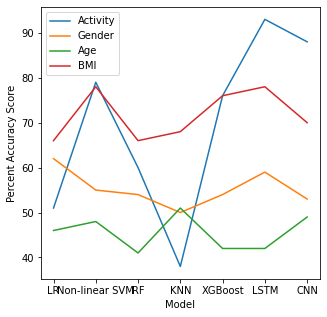

In [101]:
Accuracy_scores.plot(x="Model", y=["Activity", "Gender", "Age", "BMI"], kind="line", figsize=(5, 5))
plt.ylabel("Percent Accuracy Score")
plt.savefig('Accuracy_scores.png')